In [1]:
import numpy as np
import pandas as pd
import json
import random
from urllib.request import urlopen

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import calmap
import folium
%matplotlib inline

In [2]:
full_table = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
full_table.head()

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000 2020-01-22        2.0   
1            NaN          Japan  36.0000  138.0000 2020-01-22        2.0   
2            NaN      Singapore   1.2833  103.8333 2020-01-22        0.0   
3            NaN          Nepal  28.1667   84.2500 2020-01-22        0.0   
4            NaN       Malaysia   2.5000  112.5000 2020-01-22        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

##### Creating new feature "Active_case"
Active_case = Confirmed - Deaths - Recovered

In [3]:
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

In [4]:
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

In [5]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19220 entries, 0 to 19219
Data columns (total 9 columns):
Province/State    8432 non-null object
Country/Region    19220 non-null object
Lat               19220 non-null float64
Long              19220 non-null float64
Date              19220 non-null datetime64[ns]
Confirmed         19219 non-null float64
Deaths            19219 non-null float64
Recovered         19219 non-null float64
Active            19219 non-null float64
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.3+ MB


In [6]:
full_table.isna().sum()

Province/State    10788
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             1
Deaths                1
Recovered             1
Active                1
dtype: int64

In [7]:
full_table['Country/Region'].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [8]:
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

In [9]:
full_table[full_table['Country/Region'] == 'China']

Province/State Country/Region      Lat      Long       Date  Confirmed  \
154             Hubei          China  30.9756  112.2707 2020-01-22      444.0   
158         Guangdong          China  23.3417  113.4244 2020-01-22       26.0   
159             Henan          China  33.8820  113.6140 2020-01-22        5.0   
160          Zhejiang          China  29.1832  120.0934 2020-01-22       10.0   
161             Hunan          China  27.6104  111.7088 2020-01-22        4.0   
...               ...            ...      ...       ...        ...        ...   
19098  Inner Mongolia          China  44.0935  113.9448 2020-03-23       75.0   
19099         Ningxia          China  37.2692  106.1655 2020-03-23       75.0   
19103         Qinghai          China  35.7452   95.9956 2020-03-23       18.0   
19104           Macau          China  22.1667  113.5500 2020-03-23       24.0   
19112           Tibet          China  31.6927   88.0924 2020-03-23        1.0   

       Deaths  Recovered  Active  
154      17.0       28.0   399.0  
158       0.0        0.0    26.0  
159       0.0        0.0     5.0  
160       0.0        0.0    10.0  
161       0.0        0.0     4.0  
...       ...        ...     ...  
19098     1.0       74.0     0.0  
19099     0.0       75.0     0.0  
19103     0.0       18.0     0.0  
19104     0.0       10.0    14.0  
19112     0.0        1.0     0.0  

[2046 rows x 9 columns]

In [10]:
full_table.head()

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000 2020-01-22        2.0   
1            NaN          Japan  36.0000  138.0000 2020-01-22        2.0   
2            NaN      Singapore   1.2833  103.8333 2020-01-22        0.0   
3            NaN          Nepal  28.1667   84.2500 2020-01-22        0.0   
4            NaN       Malaysia   2.5000  112.5000 2020-01-22        0.0   

   Deaths  Recovered  Active  
0     0.0        0.0     2.0  
1     0.0        0.0     2.0  
2     0.0        0.0     0.0  
3     0.0        0.0     0.0  
4     0.0        0.0     0.0

In [11]:
full_table[['Province/State']] = full_table[['Province/State']].fillna('')

In [12]:
# India, china and the rest
India = full_table[full_table['Country/Region']=='India']
China = full_table[full_table['Country/Region']=='China']
Rest = full_table[full_table['Country/Region']!=('China', 'India')]

## Latest Data

In [13]:
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

In [14]:
# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

In [15]:
tm = temp.melt(id_vars="Date", value_vars=['Active', 'Deaths', 'Recovered'])
fig = px.treemap(tm, path=["variable"], values="value", height=400, width=600,
                 color_discrete_sequence=[rec, act, dth])
fig.show()

## Country Wise Data

In [16]:
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
#full_latest_grouped

In [17]:
temp1 = full_latest_grouped.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)
temp1.style.background_gradient(cmap='Reds')

### Maps

In [18]:
fig = px.choropleth(full_latest_grouped, locations=full_latest_grouped['Country/Region'],
                    color=full_latest_grouped['Confirmed'],locationmode='country names', 
                    hover_name=full_latest_grouped['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.deep)
fig.update_layout(
    title='Confirmed Cases In The World',
)
fig.show()

In [19]:
formated_gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Spread over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

### Countries With Death Reports

In [20]:
temp_flg = temp1[temp1['Deaths']>0][['Country/Region', 'Deaths']]
temp_flg.sort_values('Deaths', ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

### Countries with no cases recovered

In [21]:
temp = temp1[temp1['Recovered']==0][['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
temp.reset_index(drop=True).style.background_gradient(cmap='Reds')

### Top 10 Countries

In [22]:
fig = go.Figure(data=[go.Bar(
            x=temp1['Country/Region'][0:10], y=temp1['Confirmed'][0:10],
            text=temp1['Confirmed'][0:10],
            textposition='auto',
            marker_color='yellow',

        )])
fig.update_layout(
    title='Top 10 infected Cases',
    xaxis_title="Countries",
    yaxis_title="Confirmed Cases",
)
fig.show()

In [23]:
temp2 = full_latest_grouped.sort_values(by='Deaths', ascending=False).reset_index(drop=True)
fig = go.Figure(data=[go.Bar(
            x=temp2['Country/Region'][0:10], y=temp2['Deaths'][0:10],
            text=temp2['Deaths'][0:10],
            textposition='auto',
            marker_color='red',

        )])
fig.update_layout(
    title='Top 10 Death Cases',
    xaxis_title="Countries",
    yaxis_title="Deaths",
)
fig.show()

### Recovered Cases

In [24]:
Recovered_per_country = full_latest.groupby(["Country/Region"])["Recovered"].sum().reset_index().sort_values("Recovered",ascending=False).reset_index(drop=True)
fig = px.pie(Recovered_per_country, values=Recovered_per_country['Recovered'], names=Recovered_per_country['Country/Region'],
             title='Recovered cases',
            )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [25]:
fig = go.Figure(data=[go.Bar(
            x=Recovered_per_country['Country/Region'][0:10], y=Recovered_per_country['Recovered'][0:10],
            text=Recovered_per_country['Recovered'][0:10],
            textposition='auto',
            marker_color='green',

        )])
fig.update_layout(
    title='Top 10 Recovered Countries',
    xaxis_title="Countries",
    yaxis_title="Recovered Cases",
)
fig.show()

### China province wise data

In [26]:
china_latest = full_latest[full_latest['Country/Region']=='China']
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [27]:
temp2 = china_latest_grouped[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp2 = temp2.sort_values(by='Confirmed', ascending=False)
temp2 = temp2.reset_index(drop=True)
temp2.style.background_gradient(cmap='Pastel1_r')

### Provinces with no cases recovered

In [28]:
temp = china_latest_grouped[china_latest_grouped['Recovered']==0]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1_r')

### Provinces with all the cases recovered

In [29]:
temp = china_latest_grouped[china_latest_grouped['Confirmed']==
                          china_latest_grouped['Recovered']]
temp = temp[['Province/State', 'Confirmed','Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

### Provinces with no affected cases anymore

In [30]:
temp = china_latest_grouped[china_latest_grouped['Confirmed']==
                          china_latest_grouped['Deaths']+
                          china_latest_grouped['Recovered']]
temp = temp[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

In [31]:
gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
gdf = gdf.reset_index()

temp = gdf[gdf['Country/Region']=='China'].reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
            title='China', color_discrete_sequence=[cnf, dth, rec])
fig.show()

temp = gdf[gdf['Country/Region']!='China'].groupby('Date').sum().reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
             title='Rest', color_discrete_sequence=[cnf, dth, rec])
fig.show()

### Hubei - China - World

In [32]:
def location(row):
    if row['Country/Region']=='China':
        if row['Province/State']=='Hubei':
            return 'Hubei'
        else:
            return 'Other Chinese Provinces'
    else:
        return 'Rest of the World'

temp = full_table.copy()
temp['Region'] = temp.apply(location, axis=1)
temp['Date'] = temp['Date'].dt.strftime('%Y-%m-%d')
temp = temp.groupby(['Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
temp = temp.melt(id_vars=['Region', 'Date'], value_vars=['Confirmed', 'Deaths', 'Recovered'], 
                 var_name='Case', value_name='Count').sort_values('Count')
# temp = temp.sort_values(['Date', 'Region', 'Case']).reset_index()
temp.head()

fig = px.bar(temp, y='Region', x='Count', color='Case', barmode='group', orientation='h',
             text='Count', title='Hubei - China - World', animation_frame='Date',
             color_discrete_sequence= [dth, rec, cnf], range_x=[0, 70000])
fig.update_traces(textposition='outside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
# fig.update_layout(yaxis={'categoryorder':'array', 
#                          'categoryarray':['Hubei','Other Chinese Provinces','Rest of the World']})
fig.show()

temp = full_latest.copy()
temp['Region'] = temp.apply(location, axis=1)
temp = temp.groupby('Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
temp = temp.melt(id_vars='Region', value_vars=['Confirmed', 'Deaths', 'Recovered'], 
                 var_name='Case', value_name='Count').sort_values('Count')
temp.head()

fig = px.bar(temp, y='Region', x='Count', color='Case', barmode='group', orientation='h',
             text='Count', title='Hubei - China - World', 
             color_discrete_sequence= [dth, rec, cnf])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

## Country Wise

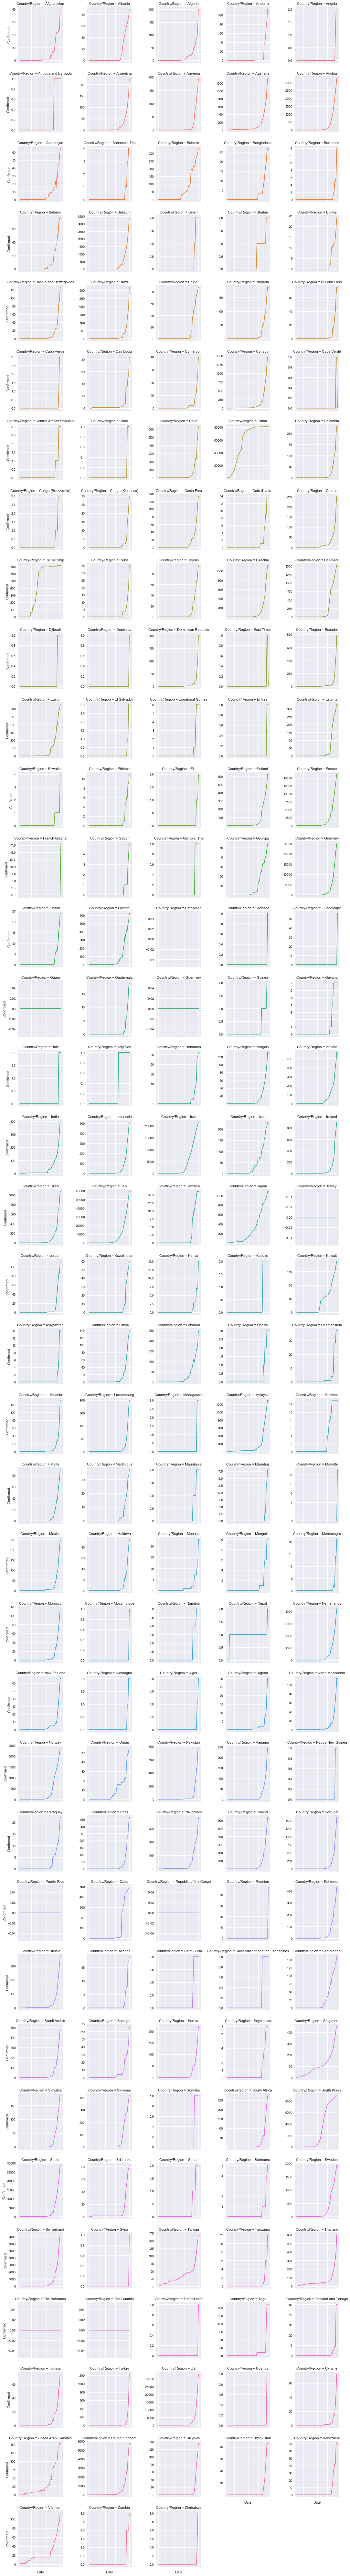

In [33]:
# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

temp = full_table.groupby(['Date', 'Country/Region'])['Confirmed'].sum()
temp = temp.reset_index().sort_values(by=['Date', 'Country/Region'])
# temp = temp[temp['Confirmed']>100]

plt.style.use('seaborn')
g = sns.FacetGrid(temp, col="Country/Region", hue="Country/Region", 
                  sharey=False, col_wrap=5)
g = g.map(plt.plot, "Date", "Confirmed")
g.set_xticklabels(rotation=90)
plt.show()

In [34]:
temp = full_table.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index().sort_values('Confirmed', ascending=False)

fig = px.line(temp, x="Date", y="Confirmed", color='Country/Region', title='Cases Spread', height=600)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [35]:
temp = full_table.groupby(['Date', 'Country/Region'])['Deaths'].sum().reset_index().sort_values('Deaths', ascending=False)

fig = px.line(temp, x="Date", y="Deaths", color='Country/Region', title='Deaths', height=600)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [36]:
fig = px.scatter(full_latest_grouped.sort_values('Deaths', ascending=False).iloc[:15, :], 
                 x='Confirmed', y='Deaths', color='Country/Region', size='Confirmed', height=600,
                 text='Country/Region', log_x=True, log_y=True, title='Deaths vs Confirmed')
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [37]:
temp = full_table.groupby('Date').sum().reset_index()

temp = temp.melt(id_vars='Date', value_vars=['Active', 'Recovered'], 
                 var_name='Case', value_name='Value')

fig = px.line(temp, x="Date", y="Value", color='Case',  
              title='Active & Recovered cases', color_discrete_sequence=[dth, rec])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()